**Basics of Data Wrangling with Pandas**

![alt text](https://drive.google.com/uc?export=view&id=1Yqgi9MadX71agkIBB1VJ_VI6rSi-uiJb)

**So what is Pandas and what does it do?**

It's a library for reading and manipulating data, mostly represented as dataframes, which most of us will be familiar with from R.


***In Pandas, your data will exist as either of:***

1.   DataFrames (tables)
2.   Series (vectors/single column)

![alt text](https://drive.google.com/uc?export=view&id=1y7qnIOAJHNfjPby3JM5AWZKKDDCAFghZ)

Pandas Dataframe is the ground from which most of the fancy modelling is built in python. 

In this Colab session, we'll try to 
1. learn the basics of reading and manipulating tabular data in python.
2. Try to see if we can import a basic csv file and do anova on it


**1. Installing Pandas**

Like many python libraries, installing pandas is as easy as running a pip install command.

For R users, think of this as "install.packages"

Pandas comes pre-installed in Colab but let's still show the pip install

In [2]:
!pip install pandas

Now that we've installed Pandas, we have to import it to be able to use it.

The "import" statement helps us do this.

For R users, think of is as the "library()" function that helps us to call packages.

It is standard practice to import Pandas, and store is as the object "pd", so that we can call "pd" everytime we want pandas to do something.

In [3]:
import pandas as pd

**DataFrame**

A DataFrame is a table. It contains an array of individual entries, each of which has a certain value. Each entry corresponds to a row (or record) and a column.

In [4]:
data=pd.DataFrame({'Year': [2018,2019, 2020,2021], 
                   'RUsers': [11,23,45,55]})
data

,Year,RUsers
0,2018,11
1,2019,23
2,2020,45
3,2021,55


**Nugget:** We have just used a python dictionary and list datatypes.

The syntax for declaring a dataframe in Pandas is a dictionary (the {} brackets) whose keys are the column names, and whose values are a list ( the [] brackets) of entries.

In [5]:
dictionary={'R': 'Great at stats',
            'MATLAB': 'Best for any work that involves multi dimensional arrays (tensors) or linear algebra',
            'Python': 'A lot of both worlds though not everything',}
aList=['R','Python','MATLAB']

print(aList)
dictionary


['R', 'Python', 'MATLAB']


{'MATLAB': 'Best for any work that involves multi dimensional arrays (tensors) or linear algebra',
 'Python': 'A lot of both worlds though not everything',
 'R': 'Great at stats'}

**Series**
A Series is a sequence of data values. In other words, it is a list. It has no column name, but it can have rownames (called index) if you want.

In [6]:
pythonUsers=pd.Series([0, 10, 18, 34])
withYears=pd.Series([0, 10, 18, 34],
                       index=["2018","2019","2020","2021"])
print(pythonUsers)
withYears

0     0
1    10
2    18
3    34
dtype: int64


2018     0
2019    10
2020    18
2021    34
dtype: int64

I can add the python users to the r users dataframe using a syntax not too dissimilar to R

In [7]:
data['pyUsers']=pythonUsers # if you want to use "withYears", you have to drop the index first withYears.reset_index(drop=True)
data

,Year,RUsers,pyUsers
0,2018,11,0
1,2019,23,10
2,2020,45,18
3,2021,55,34


There are a lot of ways to pull the elements, rows, and columns from a DataFrame

1. Dataframe.column[ ] ; This is native python

2. Dataframe.loc[ ] : This used to index using row or column names.

3. Dataframe.iloc[ ] : This uses the row or column numbers

So let's try accessing the number of R-Users and pyUsers in 2019 using all three methods

In [8]:
print(" Native method")
print(
    [data.RUsers[1],data.pyUsers[1]]
      )

print("Using column names")# Remember, iloc and loc access the row first then the column
print(
    data.loc[1,["RUsers","pyUsers"]]
    )

print("Using column numbers")
print(
    data.iloc[1,[1,2]]
    )

 Native method
[23, 10]
Using column names
RUsers     23
pyUsers    10
Name: 1, dtype: int64
Using column numbers
RUsers     23
pyUsers    10
Name: 1, dtype: int64


iloc is conceptually simpler than loc because it ignores the dataset's indices. When we use iloc we treat the dataset like a big matrix (a list of lists), one that we have to index into by position. loc, by contrast, uses the information in the indices to do its work. Since your dataset usually has meaningful indices, it's usually easier to do things using loc instead.

**Filtering data**

We can filter subsets of our data using some logic.

For example, in which years do we have more than 25 R users?

In [9]:
data.loc[data.RUsers> 25,"Year"]

2    2020
3    2021
Name: Year, dtype: int64

There can be multiple conditions

In [10]:
print(
    data.loc[(data.RUsers>25) & (data.pyUsers>= 30),"Year"]
    )
print(data)

3    2021
Name: Year, dtype: int64
   Year  RUsers  pyUsers
0  2018      11        0
1  2019      23       10
2  2020      45       18
3  2021      55       34


**Deleting Columns or Rows**

You can delete using the drop function. it literary drops whatever row or column you want. Remember that we read rows first then columns in pandas, therefore, to delete a row, you drop along axis "0". to delete a column, you drop along axis "1"

In [11]:
data2=data
data2=data2.drop(['pyUsers'], axis=1)
print("Dropped one column")
print(data2)
print("Then droppped one row")
data2=data2.drop(2)
print(data2)

Dropped one column
   Year  RUsers
0  2018      11
1  2019      23
2  2020      45
3  2021      55
Then droppped one row
   Year  RUsers
0  2018      11
1  2019      23
3  2021      55


**Row-wise operation**

Take a log transformation of every row in the RUsers column

Map is a method within Pandas that applies an operation to a column (e.g. transforming the data)

lambda is a function in python that takes a value (e.g. p) and does an operation to it (e.g. log transform)

some row-wise maths functions are better-done using numpy. python's popular number-crunching library

In [12]:
import math
data['Rlog']=data.RUsers.map(lambda p: math.log(p))
import numpy as np
data['Rlog2']=np.log(data.RUsers)

data['whichYear']=data.Year.map('this is {}'.format)
#pandas still okay for basic stuff
data['RoverPy']=data.RUsers/data.pyUsers


print(data)

   Year  RUsers  pyUsers      Rlog     Rlog2     whichYear   RoverPy
0  2018      11        0  2.397895  2.397895  this is 2018       inf
1  2019      23       10  3.135494  3.135494  this is 2019  2.300000
2  2020      45       18  3.806662  3.806662  this is 2020  2.500000
3  2021      55       34  4.007333  4.007333  this is 2021  1.617647


In [13]:
data.Rlog/data.RUsers

0    0.217990
1    0.136326
2    0.084592
3    0.072861
dtype: float64

**Reading Data from a CSV**

This is how most people will create their Pandas dataframe.
The function is just a variation of the famous "read csv"

First, i'll connect my google drive to this session so that i can directly pull files from there. This won't be necessary if you're using an offline jupyter notebook

In [14]:
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


Now to read my iris data

https://archive.ics.uci.edu/ml/datasets/iris

In [15]:
iris=pd.read_csv('/content/gdrive/My Drive/images/iris.csv')
iris.head()

,sepLength,sepWidth,petLength,petWidth,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Exploration**

Pandas has some methods for calling matplotlib to plot and visualize your data

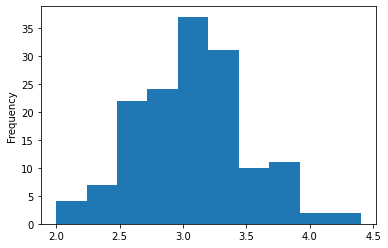

In [24]:
ax=iris.sepWidth.plot.hist()
ax

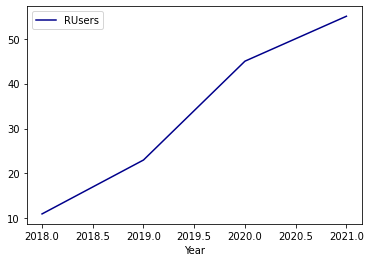

In [22]:
ax1 = data.plot.line(x='Year',
                      y='RUsers',
                      c='DarkBlue')
ax1

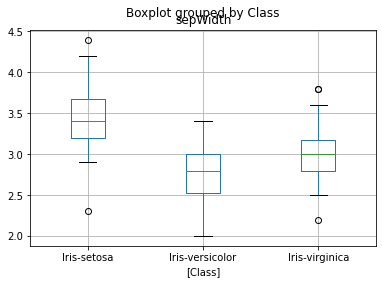

In [48]:
Data=iris.loc[:,["sepWidth","Class"]]

Data.boxplot(by='Class')

In [53]:
#list(locals().keys())


**Grouping Functions**

You can re-organize your data using the group_by function. This can be good for aggregation operations like in dplyr

In [58]:
print("Summary Statistics")
print("Table of Means")
print(iris.groupby('Class').mean())
print("Table of Standard Deviations")
print(iris.groupby('Class').std())

Summary Statistics
Table of Means
                 sepLength  sepWidth  petLength  petWidth
Class                                                    
Iris-setosa          5.006     3.428      1.462     0.246
Iris-versicolor      5.936     2.770      4.260     1.326
Iris-virginica       6.588     2.974      5.552     2.026
Table of Standard Deviations
                 sepLength  sepWidth  petLength  petWidth
Class                                                    
Iris-setosa       0.352490  0.379064   0.173664  0.105386
Iris-versicolor   0.516171  0.313798   0.469911  0.197753
Iris-virginica    0.635880  0.322497   0.551895  0.274650


**Summary Stats**

For summary stats, you might as well just use the in-built .describe() method

In [60]:
print("In-built Summary Statistics")
iris.describe()

In-built Summary Statistics


,sepLength,sepWidth,petLength,petWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Using the Dataframe**

Just to show how we can use the data frame, let's do a one way anova using python's statsmodels module

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [73]:
mod = ols('petLength ~ Class',
                data=iris).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq     df            F        PR(>F)
Class     437.1028    2.0  1180.161182  2.856777e-91
Residual   27.2226  147.0          NaN           NaN


In [79]:
mod = ols('sepLength ~ petLength',
                data=iris).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:              sepLength   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     468.6
Date:                Wed, 14 Jul 2021   Prob (F-statistic):           1.04e-47
Time:                        22:44:38   Log-Likelihood:                -77.020
No. Observations:                 150   AIC:                             158.0
Df Residuals:                     148   BIC:                             164.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3066      0.078     54.939      0.0

**Plotting Residuals**
https://zhiyzuo.github.io/Linear-Regression-Diagnostic-in-Python/